# Features Affecting Aviation Satisfaction

### 1. 실험 내용에 대한 전체 요약


*   개요 : 20대 비행기 탑승객의 만족 여부 판단하기
*   20대 비행기 탑승객의 신상 정보와 탑승 경험에 대한 설문 조사 결과를 바탕으로 해당 데이터에 대한 5가지 모델을 통해 데이터를 분석하고, 분석한 모델에 대한 평가를 기반으로 성능이 뛰어난 모델을 선정한다. 모델을 학습하기 위해 데이터를 필요한 방식으로 전처리하고,  Feature selection 과정을 포함하여 Feature selection이 모델의 성능에 미치는 영향을 알아본다.



### 2. 데이터 출처 및 선정한 데이터에 대한 설명



*  Airline Passenger Satisfaction
*  URL : https://www.kaggle.com/datasets/binaryjoker/airline-passenger-satisfaction



*   Data Description
    
    항공사는 고객 만족도 측정을 통해 서비스 품질을 개선하려는 노력을 기울인다. 고객 기대를 충족시키기 위해 승객 만족도 측정했으며, 비행 만족도에 영향을 미치는 여러 항목에 대한 설문 데이터이다.

    *   선택한 데이터의 수가 너무 많아 학습 시간이 너무 길기 때문에 탑승객 중 20대의 자료만 분석하였음.

*   Feature Description

    Gender: 탑승객의 성별에 대한 정보

    age : 탑승객의 나이에 대한 정보

    type_of_travel : 탑승 목적에 대한 정보 (Business travel, Personal Travel)
    customer_class : 탑승객의 등급에 대한 정보

    flight_distance : 탑승 거리 정보

    각 항목은 0 점에서 5 점까지로 측정됨

    inflight_wifi_service : 기내 wifi 서비스에 대한 만족도

    departure_arrival_time_convenient : 출발, 도착 시간의 편의성에 대한 만족도

    ease_of_online_booking : 온라인 예약의 편의성에 대한 만족도

    gate_location : 탑승 게이트에 대한 만족도

    food_and_drink : 기내 제공 음식과 음료에 대한 만족도

    online_boarding : 온라인 보딩에 대한 만족도

    seat_comfort : 의자의 안락함에 대한 만족도 

    inflight_entertainment : 비행 간 제공되는 엔터테이먼트의 만족도

    onboard_service : 탑승 간 서비스 만족도

    leg_room_service : 다리 공간에 대한 만족도 

    baggage_handling : 수화물에 대한 만족도

    checkin_service : 체크인 서비스 만족도

    inflight_service : 비행 간 서비스 만족도 

    cleanliness :  청결에 대한 만족도 


    departure_delay_in_minutes : 도착 지연 시간

    arrival_delay_in_minutes : 출발 지연에 시간

*   Class

    satisfaction : 판단하려는 클래스로 비행 전반에 대해 만족했는지 여부 ("neutral or dissatisfied", "satisfie"])



### 3. 실험 설계 및 방법

3.1.   자신이 선정한 모델 및 모델 선정에 대한 이유

  Perceptron : linear algorithm으로 해당 데이터의 linearity 모델의 성능을 파악하기 위해 Perceptron을 사용할 수 있다.

  Decision Tree : features 간의 상호작용을 파악하는 것이 용이한 모델이므로 선정했다.

  MLP : 일반적으로 높은 성능을 보여주는 classifier이기 때문에 non-linear 모델인 경우 높은 성능을 보여줄 것을 기대할 수 있다. 

  RandomForest (앙상블 모델) : MLP에 비해 Decision Tree의 기본 모델의 성능이 더 좋게 나온 것을 확인해본 결과 Decision Tree 기반의 Random Forest와 다른 앙상블 모델의 비교를 통해 성능 비교를 기대할 수 있다.

  AdaBoost (앙상블 모델) : Decision Tree의 모델에서 가중치를 통해 더 좋은 성능을 가진 모델로 학습하는 방식으로 높은 성능을 기대할 수 있다.



### 3.2. 데이터 전처리

In [3]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/Colab Notebooks/airline_passenger_satisfaction.csv'

Mounted at /content/drive


### 데이터 불러오기

In [53]:
import pandas as pd
filename = '/content/drive/MyDrive/Colab Notebooks/airline_passenger_satisfaction.csv'
df = pd.read_csv(filename)

### 데이터 확인

In [ ]:
df

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,129875,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,129876,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
129877,129877,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,129878,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


### 데이터 전처리

In [54]:
# 20대의 데이터를 추출
df = df[(df['age']>=20) & (df['age']<30)]

In [55]:
# Id feature  drop / 
df = df.drop(columns = ['Unnamed: 0'])

In [56]:
# Missing value 제거
df = df.dropna()

In [57]:
# 범주형 데이터 전처리 - 모두 2가지 범주를 지닌 것으로 보아 One Hot encoding을 하지 않고 internal encoding
# Gender (Female -> 0 Male -> 1)
df['Gender'] = df['Gender'].replace('Female', 0)
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].astype('int')
# customer_type (disLoyal -> 0 Loyal -> 1 ) -> Loyal 여부
df['customer_type'] = df['customer_type'].replace('disloyal Customer', 0)
df['customer_type'] = df['customer_type'].replace('Loyal Customer', 1)
df['customer_type'] = df['customer_type'].astype('int')
# type of travel (Business -> 0 personal -> 1) Personal travel 여부
df['type_of_travel'] = df['type_of_travel'].replace('Business travel', 0)
df['type_of_travel'] = df['type_of_travel'].replace('Personal Travel', 1)
df['type_of_travel'] = df['type_of_travel'].astype('int')
# customer (eco -> 0, eco plus -> 1 Business->2) 좌석 등급에 level이 있다는 가정으로 internal encoding
df['customer_class'] = df['customer_class'].replace('Eco', 0)
df['customer_class'] = df['customer_class'].replace('Eco Plus', 1)
df['customer_class'] = df['customer_class'].replace('Business', 2)
df['customer_class'] = df['customer_class'].astype('int')

In [58]:
# float 형 자료 int 형으로 변환
df = df.astype({'arrival_delay_in_minutes' : 'int'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26098 entries, 1 to 129876
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Gender                             26098 non-null  int64 
 1   customer_type                      26098 non-null  int64 
 2   age                                26098 non-null  int64 
 3   type_of_travel                     26098 non-null  int64 
 4   customer_class                     26098 non-null  int64 
 5   flight_distance                    26098 non-null  int64 
 6   inflight_wifi_service              26098 non-null  int64 
 7   departure_arrival_time_convenient  26098 non-null  int64 
 8   ease_of_online_booking             26098 non-null  int64 
 9   gate_location                      26098 non-null  int64 
 10  food_and_drink                     26098 non-null  int64 
 11  online_boarding                    26098 non-null  int64 
 12  sea

In [59]:
label = df['satisfaction']
df = df.drop(['satisfaction'], axis = 1)

In [60]:
label = label.replace('neutral or dissatisfied', 0)
label = label.replace('satisfied', 1)
label

1         0
2         1
3         0
5         0
9         0
         ..
129858    0
129860    1
129864    0
129866    0
129876    1
Name: satisfaction, Length: 26098, dtype: int64

### 전처리 데이터 확인

In [ ]:
df

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,seat_comfort,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes
1,1,0,25,0,2,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6
2,0,1,26,0,2,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0
3,0,1,25,0,2,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9
5,0,1,26,1,0,1180,3,4,2,1,...,1,1,3,4,4,4,4,1,0,0
9,1,0,20,0,0,1061,3,3,3,4,...,3,2,2,3,4,4,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129858,0,1,29,0,2,2248,4,4,4,4,...,4,4,3,5,2,3,4,4,1,0
129860,0,1,29,0,2,2864,5,5,5,5,...,3,3,5,5,5,3,5,3,0,0
129864,0,0,23,0,0,447,4,0,4,3,...,1,1,4,4,5,5,4,1,0,0
129866,0,0,21,0,0,691,4,4,4,1,...,2,2,2,1,1,2,1,2,0,0


### 기본 모델 생성, 훈련 및 평가

In [17]:
# training set, test set 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, label, test_size = 0.3)

In [ ]:
#   Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron(random_state=42)
perceptron.fit(X_train, y_train)
print("기본 모델 성능 : " + str(perceptron.score(X_test, y_test)))


기본 모델 성능 : 0.674712643678161


In [ ]:
#  Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("기본 모델 성능 : " + str(dt.score(X_test, y_test)))

기본 모델 성능 : 0.933205619412516


In [ ]:
#  MLP

from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("기본 모델 성능 : " + str(mlp.score(X_test, y_test)))

기본 모델 성능 : 0.8084291187739464


In [ ]:
# RandomForest (앙상블 모델)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=42)
forest.fit(X_train, y_train)
print("기본 모델 성능 : " + str(forest.score(X_test, y_test)))

기본 모델 성능 : 0.9403575989782886


In [ ]:
#  AdaBoost (앙상블 모델) 

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=5, random_state=42)
ada.fit(X_train, y_train)
print("기본 모델 성능 : " + str(ada.score(X_test, y_test)))

기본 모델 성능 : 0.9153256704980843


### Feature Selection 적용하기

In [61]:
# feature selection (K-best features) 이 적용된 10개의 feature를 가진 데이터

from sklearn.feature_selection import SelectKBest, chi2

df_KBest = SelectKBest(chi2, k = 10).fit_transform(df, label)
XB_train, XB_test, yB_train, yB_test = train_test_split(df_KBest, label, test_size = 0.3)

In [ ]:
#   Perceptron

perceptron_fs = Perceptron(random_state=42)
perceptron_fs.fit(XB_train, yB_train)
print("Feature Selection 모델 성능 : " + str(perceptron_fs.score(XB_test, yB_test)))

Feature Selection 모델 성능 : 0.647381864623244


In [ ]:
#  Decision Tree

dt_fs = DecisionTreeClassifier(random_state=42)
dt_fs.fit(XB_train, yB_train)
print("Feature Selection 모델 성능 : " + str(dt_fs.score(XB_test, yB_test)))

기본 모델 성능 : 0.9091954022988505


In [ ]:
#  MLP

mlp_fs = MLPClassifier(random_state=42)
mlp_fs.fit(XB_train, yB_train)
print("Feature Selection 모델 성능 : " + str(mlp_fs.score(XB_test, yB_test)))

기본 모델 성능 : 0.8420178799489144


In [ ]:
# RandomForest (앙상블 모델)

forest_fs = RandomForestClassifier(n_estimators=5, random_state=42)
forest_fs.fit(XB_train, yB_train)
print("Feature Selection 모델 성능 : " + str(forest_fs.score(XB_test, yB_test)))

기본 모델 성능 : 0.9227330779054917


In [ ]:
#  AdaBoost (앙상블 모델)

ada_fs = AdaBoostClassifier(n_estimators=5, random_state=42)
ada_fs.fit(XB_train, yB_train)
print("Feature Selection 모델 성능 : " + str(ada_fs.score(XB_test, yB_test)))

기본 모델 성능 : 0.9108556832694764


### 파라미터 변경을 통한 Trial and error



In [ ]:
#   Perceptron 기본 모델 성능 : 0.674712643678161

perceptron_high_iter = Perceptron(max_iter = 3000, random_state=42)
perceptron_high_iter.fit(X_train, y_train)

perceptron_low_iter = Perceptron(max_iter = 21, random_state=42)
perceptron_low_iter.fit(X_train, y_train)

print("max iteration을 증가시킨 모델 성능 : " + str(perceptron_high_iter.score(X_test, y_test)))
print("max iteration을 감소시킨 모델 성능 : " + str(perceptron_low_iter.score(X_test, y_test)))


perceptron_high_tol = Perceptron(tol = 1e-2, random_state=42)
perceptron_high_tol.fit(X_train, y_train)

perceptron_low_tol = Perceptron(tol = 1e-4, random_state=42)
perceptron_low_tol.fit(X_train, y_train)

print("tol을 증가시킨 모델 성능 : " + str(perceptron_high_tol.score(X_test, y_test)))
print("tol을 감소시킨 모델 성능 : " + str(perceptron_low_tol.score(X_test, y_test)))

perceptron_high_tol2 = Perceptron(max_iter = 21, tol = 1e-2, random_state=42)
perceptron_high_tol2.fit(X_train, y_train)

perceptron_low_tol2 = Perceptron(max_iter = 21, tol = 1e-4, random_state=42)
perceptron_low_tol2.fit(X_train, y_train)

print("tol을 증가시킨 모델 성능 : " + str(perceptron_high_tol2.score(X_test, y_test)))
print("tol을 감소시킨 모델 성능 : " + str(perceptron_low_tol2.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


max iteration을 증가시킨 모델 성능 : 0.674712643678161
max iteration을 감소시킨 모델 성능 : 0.6794380587484036
tol을 증가시킨 모델 성능 : 0.674712643678161
tol을 감소시킨 모델 성능 : 0.674712643678161
tol을 증가시킨 모델 성능 : 0.6550446998722861
tol을 감소시킨 모델 성능 : 0.6550446998722861


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
from numpy.lib.function_base import average
from sklearn.model_selection import cross_val_score

scr_pct1 = cross_val_score(perceptron, X_train, y_train, cv = 5)
scr_pct2 = cross_val_score(perceptron_low_iter, X_train, y_train, cv = 5)

print(average(scr_pct1), average(scr_pct2))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


0.6675612234944669 0.7146922152444303


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


max_iter
max iter parameter를 조정한 결과 이미 1000회에서 학습은 멈춰있는 상태로 더 높게 조정하는 것은 의미가 없었다. perceptron 학습은 22번째 항목에서 학습이 멈췄으며 21번째 항목에서 근소한 성능 향상을 보였다.

다른 항목을 단일로 변경하는 경우는 perceptron의 학습이 조기에 종료되었기 때문에 의미가 없었으며 max_iter를 21로 조절한 학습에서도 가중치를 사용해 변화가 없을 때까지 학습하는 perceptron은 성능의 차이가 없는 것으로 보였다.

In [ ]:
#  Decision Tree 기본 모델 성능 : 0.933205619412516 

dt_ldep = DecisionTreeClassifier(max_depth = 20, random_state=42)
dt_ldep.fit(X_train, y_train)
dt_ldep2 = DecisionTreeClassifier(max_depth = 10, random_state=42)
dt_ldep2.fit(X_train, y_train)

print("depth를 20으로 낮춘 모델 성능 : " + str(dt_ldep.score(X_test, y_test)))
print("depth를 10으로 낮춘 모델 성능 : " + str(dt_ldep2.score(X_test, y_test)))


dt_hsp = DecisionTreeClassifier(min_samples_leaf = 4, random_state=42)
dt_hsp.fit(X_train, y_train)
dt_hsp2 = DecisionTreeClassifier(min_samples_leaf = 8, random_state=42)
dt_hsp2.fit(X_train, y_train)
print("min_sample_leaf를 4로 높인 모델 성능 : " + str(dt_hsp.score(X_test, y_test)))
print("min_sample_leaf를 8로 높인 모델 성능 : " + str(dt_hsp2.score(X_test, y_test)))

dt_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=42)
dt_entropy.fit(X_train, y_train)
print("creterion으로 entropy를 사용한 모델 성능 : " + str(dt_entropy.score(X_test, y_test)))

dt_mix = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 4, criterion="entropy", random_state=42)
dt_mix.fit(X_train, y_train)
print("성능이 높은 parameter를 종합한 모델 성능 : " + str(dt_mix.score(X_test, y_test)))

dt_mix2 = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 4, random_state=42)
dt_mix2.fit(X_train, y_train)
print("성능이 높은 parameter를 종합한 모델 성능 : " + str(dt_mix2.score(X_test, y_test)))


depth를 20으로 낮춘 모델 성능 : 0.9349936143039591
depth를 10으로 낮춘 모델 성능 : 0.9448275862068966
min_sample_leaf를 4로 높인 모델 성능 : 0.9434227330779055
min_sample_leaf를 8로 높인 모델 성능 : 0.9427841634738187
creterion으로 entropy를 사용한 모델 성능 : 0.9403575989782886
성능이 높은 parameter를 종합한 모델 성능 : 0.9443167305236271
성능이 높은 parameter를 종합한 모델 성능 : 0.9484035759897829


In [ ]:
scr_dt = cross_val_score(dt, X_train, y_train, cv = 5)
scr_dt1 = cross_val_score(dt_ldep2, X_train, y_train, cv = 5)
scr_dt2 = cross_val_score(dt_hsp, X_train, y_train, cv = 5)
scr_dt3 = cross_val_score(dt_mix2, X_train, y_train, cv = 5)

print(average(scr_dt), average(scr_dt1),average(scr_dt2),average(scr_dt3))

0.9334902849567227 0.9422489646811648 0.9356249019520586 0.9419203476879267


max_depth
min_sample_split
위의 두 parameter를 조정한 결과 성능이 향상한 것은 dafault 값으로 학습된 decision tree가 과적합되어 있을 수 있음을 의미한다. 과적합을 해소하는 방식으로 튜닝된 parameter에 의해 성능이 향상함을 확인할 수 있다.

criteria
entropy 방식으로 학습한 결과 다소간의 성능 향상이 있었다.

하지만 성능이 좋은 parameter를 종합한 모델에서 단일 parameter조정 모델에 비해 약간의 성능 감소가 있었고 entropy 방식을 해제하자 성능이 증가했는데 이를 통해 entropy 방식에서 또 다른 좋은 parameter값이 존재할 수 있음을 알 수 있다.

cross validation 결과 parameter를 조합한 방식은 max_depth 만을 조절한 모델에 비해서 근소하게 낮은 성능을 보였다.


In [ ]:
#  MLP 기본 모델 성능 : 0.8084291187739464 

mlp_lg = MLPClassifier(activation = "logistic", random_state=42)
mlp_lg.fit(X_train, y_train)
print("logistic activation 모델 성능 : " + str(mlp_lg.score(X_test, y_test)))

mlp_adp = MLPClassifier(learning_rate = "adaptive", random_state=42)

mlp_adp.fit(X_train, y_train)
print("adaptive한 learnig_rate를 사용하는 모델 성능 : " + str(mlp_adp.score(X_test, y_test)))


mlp_hlr = MLPClassifier(learning_rate_init = 0.0005, random_state=42)
mlp_hlr2 = MLPClassifier(learning_rate_init = 0.001, random_state=42)

mlp_hlr.fit(X_train, y_train)
mlp_hlr2.fit(X_train, y_train)
print("learning rate 0.0005로 높인 모델 성능 : " + str(mlp_hlr.score(X_test, y_test)))
print("learning rate 0.001로 모델 성능 : " + str(mlp_hlr2.score(X_test, y_test)))

mlp_hiter = MLPClassifier(max_iter = 500, random_state=42)
mlp_liter = MLPClassifier(max_iter = 100, random_state=42)

mlp_hiter.fit(X_train, y_train)
mlp_liter.fit(X_train, y_train)
print("반복을 늘린 모델 성능 : " + str(mlp_hiter.score(X_test, y_test)))
print("반복을 줄인 모델 성능 : " + str(mlp_hiter.score(X_test, y_test)))


logistic activation 모델 성능 : 0.9319284802043423
adaptive한 learnig_rate를 사용하는 모델 성능 : 0.8084291187739464
learning rate 0.0005로 높인 모델 성능 : 0.9048531289910601
learning rate 0.001로 모델 성능 : 0.8084291187739464
반복을 늘린 모델 성능 : 0.8084291187739464
반복을 줄인 모델 성능 : 0.8084291187739464


In [ ]:
mlp_hhl = MLPClassifier(hidden_layer_sizes = 200, random_state=42)
mlp_lhl = MLPClassifier(hidden_layer_sizes = 75, random_state=42)

mlp_hhl.fit(X_train, y_train)
mlp_lhl.fit(X_train, y_train)
print("hidden layer size를 200으로 높인 모델 성능 : " + str(mlp_hhl.score(X_test, y_test)))
print("hidden layer size를 75로 맞춘 모델 성능 : " + str(mlp_lhl.score(X_test, y_test)))

hidden layer size를 200으로 높인 모델 성능 : 0.8878671775223499
hidden layer size를 75로 맞춘 모델 성능 : 0.8807151979565773


In [ ]:
mlp_hhhl = MLPClassifier(hidden_layer_sizes = 300, random_state=42)
mlp_hhhl.fit(X_train, y_train)
print("hidden layer size를 300으로 높인 모델 성능 : " + str(mlp_hhhl.score(X_test, y_test)))

hidden layer size를 300으로 높인 모델 성능 : 0.9192848020434228


In [ ]:
mlp_5hhl = MLPClassifier(hidden_layer_sizes = 500, random_state=42)
mlp_5hhl.fit(X_train, y_train)
print("hidden layer size를 500으로 높인 모델 성능 : " + str(mlp_5hhl.score(X_test, y_test)))

hidden layer size를 500으로 높인 모델 성능 : 0.8816091954022989


In [ ]:
# mlp_mix = MLPClassifier(activation = "logistic", hidden_layer_sizes = 300, learning_rate_init = 0.0005, random_state=42)
# 모델 성능 : 0.9174968071519796
mlp_mix = MLPClassifier(activation = "logistic", learning_rate_init = 0.0005, random_state=42)
mlp_mix.fit(X_train, y_train)
print("logistic activation과 higher learning rate를 적용한 모델 성능 : " + str(mlp_mix.score(X_test, y_test)))

logistic activation과 higher learning rate를 적용한 모델 성능 : 0.9340996168582375


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
scr_mlp = cross_val_score(mlp, X_train, y_train, cv = 5)
scr_mlp1 = cross_val_score(mlp_lg, X_train, y_train, cv = 5)
scr_mlp2 = cross_val_score(mlp_hlr, X_train, y_train, cv = 5)
scr_mlp3 = cross_val_score(mlp_hhhl, X_train, y_train, cv = 5)
scr_mlp4 = cross_val_score(mlp_mix, X_train, y_train, cv = 5)

print(average(scr_mlp), average(scr_mlp1),average(scr_mlp2),average(scr_mlp3),average(scr_mlp4))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

0.8575622588507607 0.9156456720084158 0.8725639871915488 0.7764396509395896 0.923527565275019


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


activation : logistic activation을 사용한 mlp 모델의 성능이 크게 상승했다.

learning_rate를 apative하게 업데이트하는 방식은 크게 영향을 미치지 못했다.

learning_rate_init를 증가시키는 방식으로 학습한 결과 0.0005로 상승한 결과 모델의 성능이 크게 상승했다.

max_iter 를 조정하여 반복수를 조정한 것은 성능에 영향을 미치지 않았다.

mlp 모델의 성능에 영향을 미친 세 파라미터를 모두 조합한 결과 성능은 모델 성능 : 0.9174968071519796로 크게 상승했지만 learning_rate와 activation 함수만 조정한 모델의 성능이 모델 성능 : 0.9340996168582375으로 더 높게 나왔다.

cross validation에서는 위의 train-test 학습 score와는 크게 다른 결과가 나왔는데 히든레이어를 조절한 mlp 모델의 성능이 크게 떨어진 것으로 보아 과적합 학습이 된 것을 추측할 수 있다.
반면 다른 모델의 성능은 증가했으며 파라미터 값을 조합해 만든 model과 logistic activation function을 사용한 모델의 성능이 크게 증가했다.

In [ ]:
# RandomForest (앙상블 모델) 기본 모델 성능 : 0.9403575989782886

from sklearn.ensemble import RandomForestClassifier

forest_dest = RandomForestClassifier(random_state=42)
forest_hest = RandomForestClassifier(n_estimators=50, random_state=42)
forest_dest.fit(X_train, y_train)
forest_hest.fit(X_train, y_train)
print("default estimator 모델 성능 : " + str(forest_dest.score(X_test, y_test)))
print("50 estimator 모델 성능 : " + str(forest_hest.score(X_test, y_test)))

forest_apt_est = RandomForestClassifier(n_estimators=30, random_state=42)
forest_apt_est.fit(X_train, y_train)
print("조정 estimator 모델 성능 : " + str(forest_apt_est.score(X_test, y_test)))

forest_dtparam = RandomForestClassifier(max_depth = 10, min_samples_leaf = 4, random_state=42)
forest_dtparam.fit(X_train, y_train)
print("dt 기반 parameter 모델 성능 : " + str(forest_dtparam.score(X_test, y_test)))


default estimator 모델 성능 : 0.9501915708812261
50 estimator 모델 성능 : 0.9514687100893997
조정 estimator 모델 성능 : 0.9492975734355045
dt 기반 parameter 모델 성능 : 0.9438058748403576


In [ ]:
forest_mix = RandomForestClassifier(max_depth = 10, min_samples_leaf = 4, n_estimators =  50, random_state=42)
forest_mix.fit(X_train, y_train)
print("성능이 높은 parameter를 종합한 모델 성능 : " + str(forest_mix.score(X_test, y_test)))

성능이 높은 parameter를 종합한 모델 성능 : 0.9436781609195403


In [ ]:
scr_fr = cross_val_score(forest, X_train, y_train, cv = 5)
scr_fr1 = cross_val_score(forest_hest, X_train, y_train, cv = 5)

print(average(scr_fr),average(scr_fr1))

0.9367750164780475 0.9490363320158387


n_estimator를 50으로 늘리자 성능이 상승했다.

max depth 와 min samples leaf의 값은 dt에서 좋은 성능을 보인 파라미터로 조정했다. 약간의 성능 향상이 있었지만 dt와 달리 성능의 큰 상승으로 이어지지는 않았다.

두 파라미터 조정의 결과를 조합한 결과 성능은 estimator만을 조정한 모델에 비해 떨어졌다.

cross validation 에서도 estimator를 조절한 모델의 성능이 상승했다.

In [ ]:
#  AdaBoost (앙상블 모델) 기본 모델 성능 : 0.9153256704980843

from sklearn.ensemble import AdaBoostClassifier


ada_dest = AdaBoostClassifier(random_state=42)
ada_hest = AdaBoostClassifier(n_estimators=25, random_state=42)
ada_dest.fit(X_train, y_train)
ada_hest.fit(X_train, y_train)
print("default estimator 모델 성능 : " + str(ada_dest.score(X_test, y_test)))
print("25 estimator 모델 성능 : " + str(ada_hest.score(X_test, y_test)))

ada_est100 = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_est100.fit(X_train, y_train)

print("100 estimator 모델 성능 : " + str(ada_est100.score(X_test, y_test)))

default estimator 모델 성능 : 0.9309067688378033
25 estimator 모델 성능 : 0.927330779054917
100 estimator 모델 성능 : 0.9315453384418901


In [ ]:
scr_ada = cross_val_score(ada, X_train, y_train, cv = 5)
scr_ada1 = cross_val_score(ada_est100, X_train, y_train, cv = 5)

print(average(scr_ada),average(scr_ada1))

0.9090216092793095 0.9289469587420257


estimator 조정의 결과 estimator의 수를 늘리는 것이 성능의 향상에 도움이 되었다.


### feature selection 적용 비교

cross validation 에서 성능이 좋게 나온 model에 feature selection을 적용했다.

In [ ]:
perceptron_fs = Perceptron(random_state=42)
perceptron_fs.fit(XB_train, yB_train)
perceptron_low_iter_fs = Perceptron(max_iter = 21, random_state=42)
perceptron_low_iter_fs.fit(XB_train, yB_train)

print(average(cross_val_score(perceptron_fs, XB_train, yB_train, cv = 5)))
print(average(cross_val_score(perceptron_low_iter_fs, XB_train, yB_train, cv = 5)))

0.4296514505251774
0.4296514505251774


Perceptron의 경우는 feature selection의 영향 또한 받지 않았다. 모델 자체의 성능이 좋지 않으며, parameter 조절로 인한 성능의 변화가 거의 없기 때문에 기본 모델이 최고의 모델이라고 해도 무방하다.

In [ ]:
dt_fs = DecisionTreeClassifier(random_state=42)
dt_ldepfs = DecisionTreeClassifier(max_depth = 10, random_state=42)
dt_mixfs = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 4, random_state=42)


dt_fs.fit(XB_train, yB_train)
dt_ldepfs.fit(XB_train, yB_train)
dt_mixfs.fit(XB_train, yB_train)

print(average(cross_val_score(dt_fs, XB_train, yB_train, cv = 5)))
print(average(cross_val_score(dt_ldepfs, XB_train, yB_train, cv = 5)))
print(average(cross_val_score(dt_mixfs, XB_train, yB_train, cv = 5)))

0.91175851595535
0.9286184616163755
0.927961662149906


Decision Tree는 Feature Selection이 성능을 저하시켰다. Decision Tree에서 가장 좋은 성능을 보인 파라미터 조정은 depth를 10으로 조절한 모델이다.

In [ ]:
mlp_fs = MLPClassifier(random_state=42)
mlp_fs.fit(XB_train, yB_train)

print(average(cross_val_score(mlp_fs, XB_train, yB_train, cv = 5)))

0.8482611483225055


In [ ]:
mlp_lgfs = MLPClassifier(activation = "logistic", random_state=42)
mlp_mixfs = MLPClassifier(activation = "logistic", learning_rate_init = 0.0005, random_state=42)

mlp_lgfs.fit(XB_train, yB_train)
mlp_mixfs.fit(XB_train, yB_train)

print(average(cross_val_score(mlp_lgfs, XB_train, yB_train, cv = 5)))
print(average(cross_val_score(mlp_mixfs, XB_train, yB_train, cv = 5)))

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.891887421559774


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9078721690085046


mlp 또한 기본 모델을 제외하고 Feature selection으로 인한 성능 저하를 겪었다. mlp에서 가장 좋은 성능을 보여준 모델은 activation function을 logistic으로 하고 learning_rate를 0.0005로 조정한 모델이었다.

In [ ]:
forest_fs = RandomForestClassifier(n_estimators=5, random_state=42) 
forest_hestfs = RandomForestClassifier(n_estimators=50, random_state=42)

forest_fs.fit(XB_train, yB_train)
forest_hestfs.fit(XB_train, yB_train)

print(average(cross_val_score(forest_fs, XB_train, yB_train, cv = 5)))
print(average(cross_val_score(forest_hestfs, XB_train, yB_train, cv = 5)))

0.9225975126576428
0.9297684263078789


Random Forest 또한 Feature selection으로 인한 성능 저하를 겪었다. Random Forest에서 가장 성능이 좋은 모델은 estimator의 수를 50으로 조정한 모델이

In [ ]:
ada_fs = AdaBoostClassifier(n_estimators=5, random_state=42)
ada_est100fs = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_fs.fit(XB_train, yB_train)
ada_est100fs.fit(XB_train, yB_train)

print(average(cross_val_score(ada_fs, XB_train, yB_train, cv = 5)))
print(average(cross_val_score(ada_est100fs, XB_train, yB_train, cv = 5)))

0.9105540564615298
0.9095138605139832


Feature selection의 결과는 일반적으로 모델의 성능을 저하시켰다. adaBoost 에서 약간의 성능 향상을 보여주며 두 모델의 성능이 반전되었다, 하지만 여전히 Feature Selection 이전의 n_estimator = 100 모델이 가장 좋은 성능을 보여주고 있다.

### 4. 실험 결과 분석
  
  cross-validation을 통해 검증한 결과, 각 모델에서 가장 성능이 좋은 model은 다음과 같다.

  *  Perceptron

  기본 모델 : 0.6675612234944669 -> 파라미터 조정(max_iter = 21) 0.7146922152444303

  *  Decision Tree

  기본 모델 : 0.9334902849567227 -> 파라미터 조정(max_depth = 10) 0.9422489646811648

  *  MLP

  기본 모델 : 0.8575622588507607 -> 파라미터 조정(activation = "logistic", learning_rate_init = 0.0005) 0.923527565275019

  *  Random Forest

  기본 모델 : 0.9367750164780475 -> 파라미터 조정(n_estimator = 50) 0.9490363320158387

  *  AdaBoost

  기본 모델 : 0.9090216092793095 -> 파라미터 조정(n_estimator = 100) 0.9289469587420257



### Test Case를 통한 최종 모델 평가

In [ ]:
prc_lst = Perceptron(max_iter = 21, random_state=42)
prc_lst.fit(X_train, y_train)
print("Perceptron : " + str(prc_lst.score(X_test, y_test)))

dt_lst = DecisionTreeClassifier(max_depth = 10, random_state=42)
dt_lst.fit(X_train, y_train)
print("Decision Tree Classifier : " + str(dt_lst.score(X_test, y_test)))

mlp_lst = MLPClassifier(activation = "logistic", learning_rate_init = 0.0005, random_state=42)
mlp_lst.fit(X_train, y_train)
print("MLPClassifier : " + str(mlp_lst.score(X_test, y_test)))

rf_lst = RandomForestClassifier(n_estimators=50, random_state=42)
rf_lst.fit(X_train, y_train)
print("Random Forest Classifier : " + str(rf_lst.score(X_test, y_test)))

ada_lst = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_lst.fit(X_train, y_train)
print("AdaBoost Classifier : " + str(ada_lst.score(X_test, y_test)))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Perceptron : 0.6794380587484036
Decision Tree Classifier : 0.9448275862068966


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier : 0.9340996168582375
Random Forest Classifier : 0.9514687100893997
AdaBoost Classifier : 0.9315453384418901



Perceptron의 경우 다른 모델과의 비교를 통해 모델의 선형성을 파악하기 위해 학습되었다, Perceptron은 다른 모델과 비교해 낮은 성능을 보였는데 따라서 비선형 데이터에 대한 분석이 가능한 다른 모델과는 달리 낮은 성능을 보인 것으로 보아 해당 데이터는 비선형적 분석을 위한 모델이 필요하며 Perceptron이 위 데이터를 분석하기 위한 적절한 모델이었다고 할 수 없다.

Decision Tree 는 규칙을 생성해 나가며 데이터에 적응해 나가는 방식으로 feature에 대한 지식이 없을 때 적합한 학습을 하기에 좋은 모델이다. 훈련에 적합하지 않다고 판단한 입력에 손실이 있는 반면 MLP의 경우 모든 features에 대해 적합한 학습을 하려고 한다. 0 또는 1 형태로 되어 있는 class에 대한 예측에서 높은 정확도를 보여주는 모델에서 decision tree가 높은 예측률을 보여주기 때문에 mlp보다 높은 성능을 보여주었다고 볼 수 있다.

모든 feature에 대해 학습을 하려고 하는 MLP의 특성 상 overfitting의 위험성이 있으며 이는 일반적인 scores에서 높은 점수를 나타냈지만 cross validation에서 점수가 급격히 감소한 (hidden layer) 파라미터를 조정한 모델에서 알 수 있었다. feature selection에서의 성능이 감소한 것으로 볼 때 학습에 더 기여하는 feature이 더 존재하는 한편, DT의 성능과 비교한 것에서는 학습에 기여하지 않는 feature들도 더 존재했을 것이라고 추측할 수 있다.

Random Forest는 더 generality를 향상시켜 overfitting 위험을 감소시킨다. 전체 모델을 통틀어 가장 높은 훈련 성능을 보여주었다. 데이터 정규화 여부로부터 학습이 자유로운 특성상 다른 모델에서 정규화 과정을 통해 성능 향상을 기대할 수 있었을 것 같다. decision tree와 약간의 성능 차이가 나타나는데 decision tree만으로도 좋은 성능을 보여주는 것을 보면 성능이 rule을 베이스로 한 모델에 적합한 데이터로 추정할 수 있다.

adaBoost의 경우 Perceptron을 제외한 다른 모델 중 가장 낮은 성능을 보여주었는데 일반적으로 모델의 학습성능이 좋은 앙상블 모델인 것을 감안하면 낮은 성능을 보여주고 있다는 사실을 확인할 수 있다.






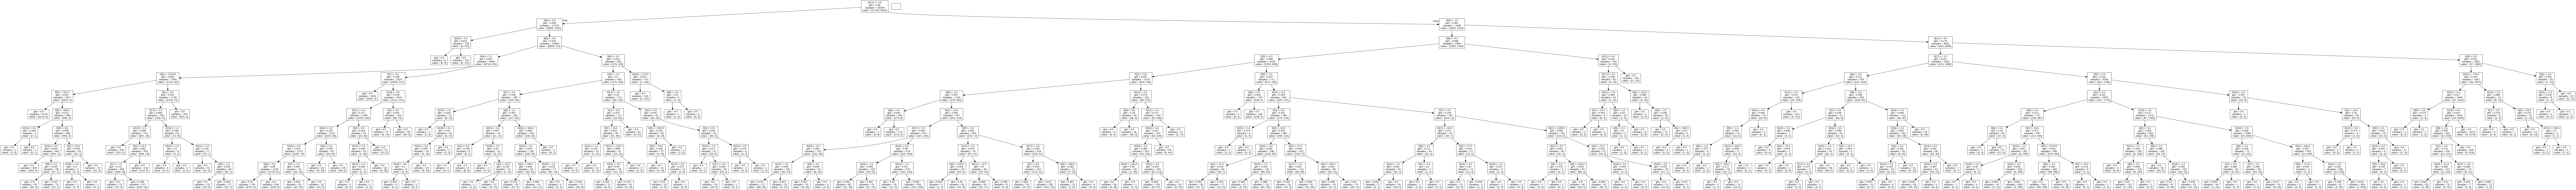

In [ ]:
from sklearn.tree import export_graphviz # drawing graphs specified in DOT language scripts
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_lst, out_file=dot_data)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('/tree.png')
Image(graph.create_png())

### 앙상블 방법과 성능 비교 및 분석 작성

random forest와 AdaBoost는 모두 decision tree 를 바탕으로 한다. 랜덤 포레스트에서 훈련 데이터는 Bagging 을 기반으로 샘플링된다. Bagging 기법은 원본 data의 다중 세트를 생성하기 위해 반복과 조합을 사용하여 data에서 훈련을 위한 추가 데이터를 생성하여 예측의 분산을 줄이는 데이터 샘플링 기법이다. 이는 교체와 함께 무작위로 데이터를 샘플링하는 것을 포함한다. 즉, 일부 데이터는 여러 번 샘플링되는 반면 다른 데이터는 전혀 샘플링되지 않을 수 있다. 

AdaBoost에서는 node가 하나, leaf가 두 개인 트리를 사용한다, 다음 순번의 Decision tree를 훈련하는 데 사용되는 훈련 데이터는 이전 학습된 Tree의 데이터 세트의 잘못된 분류를 기반으로 더 높은 가중치가 할당된 데이터 샘플이 거의 없다. 잘못 분류된 데이터 샘플 중에서 더 높은 가중치가 할당된 데이터 샘플이 거의 없다는 사실은 새로운 데이터 샘플에서 반복적으로 샘플링된다.

AdaBoost 는 leaf가 2개인 Tree 모델을 통해 학습을 반복하는데 Random Forest에서는 classify하기 위해 여러 features들을 사용하는 반면, AdaBoost는 하나의 feature에 기반한 stump들을 여러 개 학습힌다.

앙상블 모델이 아닌 두 모델의 성능을 비교해보았을 때 Random forest의 경우 두 모델에 비해 성능 향상을 보여준다. 이는 Decision Tree의 성능이 높은 점을 고려해보았을 때 하나의 트리를 통해 학습하는 Decision Tree보다 여러  Tree들을 통해 좋은 학습 성능을 보인 Tree를 선택해 예측하는 Random forest의 특성 상 당연한 것으로 보인다.

반면 AdaBoost는 좋은 성능을 보여주지 못하고 있는데 해당 데이터셋이 여러 feature들을 종합적으로 고려하는 Tree 모델이 해당 데이터를 학습하기 위해 더 적절하다는 점을 추측할 수 있다.

### Feature selection 에 대한 분석

기본 모델

Perceptron : 0.674712643678161 

Decision Tree : 0.933205619412516 

MLP : 0.8084291187739464 

Random Forest : 0.9403575989782886 

AdaBoost : 0.9153256704980843

기본 모델 ( Feature selection data)

Perceptron : 0.4296514505251774 

Decision Tree : 0.91175851595535 

MLP : 0.8482611483225055 

Random Forest : 0.9225975126576428 

AdaBoost : 0.9105540564615298

다른 모델과 달리 mlp의 경우 꽤 높은 수준의 성능 향상을 겪은 것을 확인할 수 있다, 이는 학습에 방해가 될 수 있는 feature 들이 데이터에 다소 섞여 있어 MLP의 경우 overfitting 문제를 겪었을 수 있음을 의미한다. 

하지만 일반적으로 다른 모델에서 10개의 best features를 택해서 학습한 모델이 성능 저하를 겪었으므로 10개 이상의 feature들이 항공사 이용 고객들의 만족도에 영향을 미치고 있다고 볼 수 있다. 

MLP의 성능이 Decision Tree와 비교해서 낮게 나타난 것으로 추측해볼 때, feature selection 과정에서 원 데이터의 features보다 적고 10개보다 더 많은 수의 feature를 택해서 학습이 진행되었다면 MLP 성능 향상을 관찰했을 가능성도 있을 것으로 추측된다.

다른 모델에서도 마찬가지로 더 많은 features 들을 이용한 학습에서 성능 향상을 보였을 가능성도 존재한다. 결론적으로 해당 데이터에서는 학습에 부정적인 영향을 미치는 Feature들이 다소 존재하지만 최소 10개 이상의 feature들은 항공사 고객들의 만족도에 영향을 미치는 것으로 추측할 수 있다.

# 결론

여러 모델들 중 가장 성능이 좋은 모델은 Decision Tree 기반의 Random Forest**(Random Forest Classifier : 0.9514687100893997)**였다.

해당 데이터의 class는 균형적으로 만족/불만족 (= 약 0.43) 데이터가 존재하고 있으므로 다른 모델의 성능 score도 모두 0.9 이상으로 훌륭하게 classifier를 수행하고 있다고 볼 수 있다.

Feature Selection에서 20대 항공 이용객에게 중요하게 나온 Feature들은 다음과 같다.

* type_of_travel	
* customer_class	
* flight_distance	
* inflight_wifi_service	
* ease_of_online_booking	
* food_and_drink	
* online_boarding	
* seat_comfort	
* departure_delay_in_minutes	
* arrival_delay_in_minutes

결론적으로, 위 데이터는 linearity를 조사하기 위해 수행한 Perceptron의 성능을 고려해보았을 때 non-linear한 기법이 사용되어야 하며, 비선형적인 모델들이 훌륭한 예측도를 보여주고 있다. 이 중 가장 성능이 좋은 것은 Decision Tree 기반의 Random Forest이다. 마지막으로, 데이터 셋의 features 는 일반적으로 학습에 관련이 있는 항목으로 이루어졌다고 평가할 수 있다.

